In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.layers import InputLayer, Dense, Dropout

import matplotlib.pyplot as plt

import math

from time import time

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, recall_score, precision_score
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
df.Class.value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [4]:
X = df.loc[:, "V1":"V28"].values

In [5]:
y = df.Class.values

In [6]:
training_size = int(len(X)*0.7)
training_size

199364

In [7]:
X_train, y_train = X[:training_size], y[:training_size]
X_test, y_test = X[training_size:], y[training_size:]

In [15]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.998074
1    0.001926
dtype: float64

In [16]:
pd.Series(y_test).value_counts()/len(y_test)

0    0.998736
1    0.001264
dtype: float64

In [9]:
n_x = X_train.shape[1]

tf.set_random_seed(1)
np.random.seed(1)

tensor_board = keras.callbacks.TensorBoard(log_dir="/tmp/tf/logs/%d" % time())

model = keras.Sequential()
model.add(InputLayer((n_x, )))
model.add(Dense(units=1, activation="sigmoid"))
model.summary()
model.compile(loss=keras.losses.binary_crossentropy
            , metrics=["accuracy"], optimizer="adam")
model.fit(X_train, y_train, batch_size=256
          , validation_data = (X_test, y_test)
          , epochs=10
          , verbose = 1
          , callbacks=[tensor_board])
y_test_pred = model.predict_classes(X_test).flatten()
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 29        
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
Train on 199364 samples, validate on 85443 samples
Epoch 1/10
199364/199364 [==============================] - 2s 10us/step - loss: 0.5684 - acc: 0.7869 - val_loss: 0.5728 - val_acc: 0.8000
Epoch 2/10
199364/199364 [==============================] - 2s 8us/step - loss: 0.2960 - acc: 0.9833 - val_loss: 0.3741 - val_acc: 0.9840
Epoch 3/10
199364/199364 [==============================] - 2s 8us/step - loss: 0.1864 - acc: 0.9977 - val_loss: 0.2352 - val_acc: 0.9993
Epoch 4/10
199364/199364 [==============================] - 2s 9us/step - lo

(<matplotlib.figure.Figure at 0x10a3b6908>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a3b6358>)

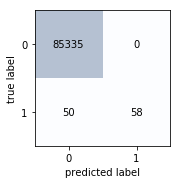

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                290       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________
Train on 199364 samples, validate on 85443 samples
Epoch 1/10
199364/199364 [==============================] - 2s 12us/step - loss: 0.0654 - acc: 0.9958 - val_loss: 0.0070 - val_acc: 0.9987
Epoch 2/10
199364/199364 [==============================] - 2s 10us/step - loss: 0.005

(<matplotlib.figure.Figure at 0x1a1de4d9e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f1b5eb8>)

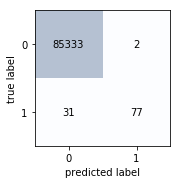

In [14]:
n_x = X_train.shape[1]

tf.set_random_seed(1)
np.random.seed(1)

tensor_board = keras.callbacks.TensorBoard(log_dir="/tmp/tf/logs/%d" % time())

model = keras.Sequential()
model.add(InputLayer((n_x, )))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=5, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.summary()
model.compile(loss=keras.losses.binary_crossentropy
            , metrics=["accuracy"], optimizer="adam")
model.fit(X_train, y_train, batch_size=256
          , validation_data = (X_test, y_test)
          , epochs=10
          , verbose = 1
          , callbacks=[tensor_board])
y_test_pred = model.predict_classes(X_test).flatten()
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 20)                580       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Train on 199364 samples, validate on 85443 samples
Epoch 1/10
199364/199364 [==============================] - 3s 14us/step - loss: 0.1147 - acc

(<matplotlib.figure.Figure at 0x1a23bfd400>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a23fc4be0>)

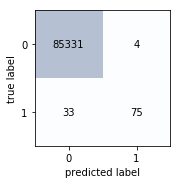

In [21]:
n_x = X_train.shape[1]

tf.set_random_seed(1)
np.random.seed(1)

tensor_board = keras.callbacks.TensorBoard(log_dir="/tmp/tf/logs/%d" % time())

model = keras.Sequential()
model.add(InputLayer((n_x, )))
model.add(Dense(units=20, activation="relu"))
model.add(Dense(units=10, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation="sigmoid"))
model.summary()
model.compile(loss=keras.losses.binary_crossentropy
            , metrics=["accuracy"], optimizer="adam")
model.fit(X_train, y_train, batch_size=256
          , validation_data = (X_test, y_test)
          , epochs=10
          , verbose = 1
          , callbacks=[tensor_board])
y_test_pred = model.predict_classes(X_test).flatten()
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred))

In [22]:
model.save("/tmp/tf/credit-fraud.h5")

In [23]:
model2 = keras.models.load_model("/tmp/tf/credit-fraud.h5")

In [25]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 20)                580       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [27]:
model2.evaluate(X_test, y_test)

85443/85443 [==============================] - 3s 29us/step


[0.0026516693321756157, 0.9995669627705019]

In [30]:
X_train1 = X_train[:training_size//2]
y_train1 = y_train[:training_size//2]
X_train2 = X_train[training_size//2:]
y_train2 = y_train[training_size//2:]

In [32]:
n_x = X_train.shape[1]

tf.set_random_seed(1)
np.random.seed(1)

tensor_board = keras.callbacks.TensorBoard(log_dir="/tmp/tf/logs/%d" % time())

model3 = keras.Sequential()
model3.add(InputLayer((n_x,)))
model3.add(Dense(units=10, activation="relu"))
model3.add(Dense(units=5, activation="relu"))
model3.add(Dense(units=1, activation="sigmoid"))
model3.summary()
model3.compile(loss=keras.losses.binary_crossentropy
            , metrics=["accuracy"], optimizer="adam")
model3.fit(X_train1, y_train1, batch_size=256
          , validation_data = (X_test, y_test)
          , epochs=10
          , verbose = 1
          , callbacks=[tensor_board])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________
Train on 99682 samples, validate on 85443 samples
Epoch 1/10
99682/99682 [==============================] - 2s 16us/step - loss: 0.1175 - acc: 0.9931 - val_loss: 0.0451 - val_acc: 0.9987
Epoch 2/10
99682/99682 [==============================] - 1s 12us/step - loss: 0.0091 - a

In [33]:
model3.evaluate(X_test, y_test)

85443/85443 [==============================] - 2s 27us/step


[0.006516061194454266, 0.998735999438222]

In [35]:
model3.fit(X_train2, y_train2, batch_size=256
          , validation_data = (X_test, y_test)
          , epochs=10
          , verbose = 1
          , callbacks=[tensor_board])


Train on 99682 samples, validate on 85443 samples
Epoch 1/10
99682/99682 [==============================] - 1s 12us/step - loss: 0.0044 - acc: 0.9984 - val_loss: 0.0034 - val_acc: 0.9987
Epoch 2/10
99682/99682 [==============================] - 1s 12us/step - loss: 0.0038 - acc: 0.9984 - val_loss: 0.0032 - val_acc: 0.9987
Epoch 3/10
99682/99682 [==============================] - 1s 11us/step - loss: 0.0037 - acc: 0.9984 - val_loss: 0.0031 - val_acc: 0.9987
Epoch 4/10
99682/99682 [==============================] - 1s 11us/step - loss: 0.0035 - acc: 0.9985 - val_loss: 0.0030 - val_acc: 0.9996
Epoch 5/10
99682/99682 [==============================] - 1s 14us/step - loss: 0.0034 - acc: 0.9994 - val_loss: 0.0029 - val_acc: 0.9996
Epoch 6/10
99682/99682 [==============================] - 1s 12us/step - loss: 0.0033 - acc: 0.9994 - val_loss: 0.0029 - val_acc: 0.9996
Epoch 7/10
99682/99682 [==============================] - 1s 12us/step - loss: 0.0032 - acc: 0.9994 - val_loss: 0.0029 - val_acc

In [36]:
model3.evaluate(X_test, y_test)

85443/85443 [==============================] - 2s 29us/step


[0.0028365409679235523, 0.999602073897218]

(<matplotlib.figure.Figure at 0x1a24b0ce80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a25415e48>)

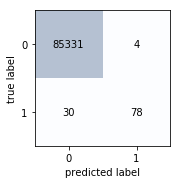

In [38]:
y_test_pred = model3.predict_classes(X_test).flatten()
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred))

# Next steps


 - Add more layers 
 - Change the number of neurons per layers
 - Change the number of epochs, batch size
 - Learning rate
 - Inialializers
